In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as scs
import seaborn as sns
import datetime
import yfinance as yf
import pickle

In [2]:
    SECTOR_ETF_SYMBOLS = {
        'XLB': 'Materials',
        'XLC': 'Communication Services',
        'XLE': 'Energy',
        'XLF': 'Financials',
        'XLI': 'Industrials',
        'XLK': 'Information Technology',
        'XLP': 'Consumer Staples',
        'XLRE': 'Real Estate',
        'XLU': 'Utilities',
        'XLV': 'Health Care',
        'XLY': 'Consumer Discretionary'
    }

    IMPT_COLUMNS = {'spy_close': 'S&P',
                    'xlb_close': 'Materials',
                    'xlc_close': 'Communication Services',
                    'xle_close': 'Energy',
                    'xlf_close': 'Financials',
                    'xli_close': 'Industrials',
                    'xlk_close': 'Information Technology',
                    'xlp_close': 'Consumer Staples',
                    'xlre_close': 'Real Estate',
                    'xlu_close':  'Utilities',
                    'xlv_close': 'Health Care',
                    'xly_close': 'Consumer Discretionary'}
    symbols = SECTOR_ETF_SYMBOLS.keys()

In [3]:
    def create_initial_spy_dataframe(start_date="2007-01-01", end_date=datetime.date.today().isoformat()):
      spy_data = yf.download("SPY", start=start_date, end=end_date)
      spy_data = spy_data[['Adj Close']]
      spy_data.rename(columns={'Adj Close': 'spy_close'}, inplace=True)
      return spy_data

In [4]:
spy_df = create_initial_spy_dataframe()

[*********************100%***********************]  1 of 1 completed


/Users/sachin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [5]:
spy_df

,spy_close
Date,
2007-01-03,107.832581
2007-01-04,108.061440
2007-01-05,107.199524
2007-01-08,107.695328
2007-01-09,107.603760
...,...
2020-04-02,251.830002
2020-04-03,248.190002
2020-04-06,264.859985


In [6]:
 def add_symbol_data_to_dataframe(init_df, start_date="2007-01-01", end_date=datetime.date.today().isoformat()):
      for sym in symbols:
          data = yf.download(sym, start=start_date, end=end_date)
          init_df[f'{sym.lower()}_close'] = data['Adj Close']
      return init_df

In [7]:
add_symbol_data_to_dataframe(spy_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,spy_close,xlb_close,xlc_close,xle_close,xlf_close,xli_close,xlk_close,xlp_close,xlre_close,xlu_close,xlv_close,xly_close
Date,,,,,,,,,,,,
2007-01-03,107.832581,25.767790,NaN,40.278873,17.610264,26.685133,19.024708,18.462629,NaN,22.747271,26.436159,31.657227
2007-01-04,108.061440,25.648664,NaN,39.545620,17.553020,26.571518,19.318270,18.490711,NaN,22.716377,26.736027,31.649019
2007-01-05,107.199524,25.477436,NaN,39.809029,17.414692,26.480625,19.163330,18.357285,NaN,22.308636,26.586088,31.435328
2007-01-08,107.695328,25.477436,NaN,39.809029,17.491016,26.579100,19.220415,18.385380,NaN,22.296274,26.617653,31.484642
2007-01-09,107.603760,25.484867,NaN,39.467331,17.462395,26.563938,19.244881,18.427515,NaN,22.314800,26.586088,31.657227
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-02,251.830002,43.660000,43.020000,30.150000,20.040001,57.099998,78.330002,54.919998,29.549999,53.709999,87.570000,94.050003
2020-04-03,248.190002,42.610001,42.150002,29.830000,19.639999,56.340000,77.120003,55.349998,29.299999,51.790001,86.779999,92.410004
2020-04-06,264.859985,45.779999,44.930000,31.410000,21.049999,60.240002,83.699997,57.410000,31.420000,55.790001,91.330002,100.099998


In [8]:
    def calculate_betas(init_df, window=10, absvalue=):
      pct_changes = init_df.pct_change()
      for sym in symbols:
        if absvalue == True:
          pct_changes[f'{sym.lower()}_beta'] = abs(pct_changes.rolling(window).cov().unstack()['spy_close'][f'{sym.lower()}_close'] / pct_changes['spy_close'].rolling(window).var())
        else:
          pct_changes[f'{sym.lower()}_beta'] = pct_changes.rolling(window).cov().unstack()['spy_close'][f'{sym.lower()}_close'] / pct_changes['spy_close'].rolling(window).var()
      return pct_changes

In [61]:
betas = calculate_betas(spy_df)

In [90]:
betas[:30]

,spy_close,xlb_close,xlc_close,xle_close,xlf_close,xli_close,xlk_close,xlp_close,xlre_close,xlu_close,...,xlc_beta,xle_beta,xlf_beta,xli_beta,xlk_beta,xlp_beta,xlre_beta,xlu_beta,xlv_beta,xly_beta
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.002122,-0.004623,NaN,-0.018204,-0.003251,-0.004258,0.015431,0.001521,NaN,-0.001358,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-05,-0.007976,-0.006676,NaN,0.006661,-0.007881,-0.003421,-0.008020,-0.007216,NaN,-0.017949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-08,0.004625,0.000000,NaN,0.000000,0.004383,0.003719,0.002979,0.001530,NaN,-0.000554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-09,-0.000850,0.000292,NaN,-0.008583,-0.001636,-0.000570,0.001273,0.002292,NaN,0.000831,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
five_year_betas = get_data_for_a_period(betas, '2015-03-06', '2020-04-08')

In [94]:
 IMPT_BETA_COLUMNS = {'xlb_beta': 'Materials',
                        'xlc_beta': 'Communication Services',
                        'xle_beta': 'Energy',
                        'xlf_beta': 'Financials',
                        'xli_beta': 'Industrials',
                        'xlk_beta': 'Information Technology',
                        'xlp_beta': 'Consumer Staples',
                        'xlre_beta': 'Real Estate',
                        'xlu_beta':  'Utilities',
                        'xlv_beta': 'Health Care',
                        'xly_beta': 'Consumer Discretionary'}

In [96]:
IMPT_BETA_COLUMNS.keys()

dict_keys(['xlb_beta', 'xlc_beta', 'xle_beta', 'xlf_beta', 'xli_beta', 'xlk_beta', 'xlp_beta', 'xlre_beta', 'xlu_beta', 'xlv_beta', 'xly_beta'])

In [129]:
    def plot_histogram_of_betas(df):
      fig, ax = plt.subplots(figsize=(12, 10))
      ax.set_title('Histogram of Betas for each sector', fontsize=18)
      ax.set_ylabel('frequence', fontsize=14)
      ax.set_xlabel('beta value', fontsize=14)
      plt.tight_layout()
      df.rename(columns=IMPT_BETA_COLUMNS)[IMPT_BETA_COLUMNS.values()].hist(sharey=True, ax=ax)
      plt.savefig('Distribution of Betas over 5 year period.png')

/Users/sachin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  import sys


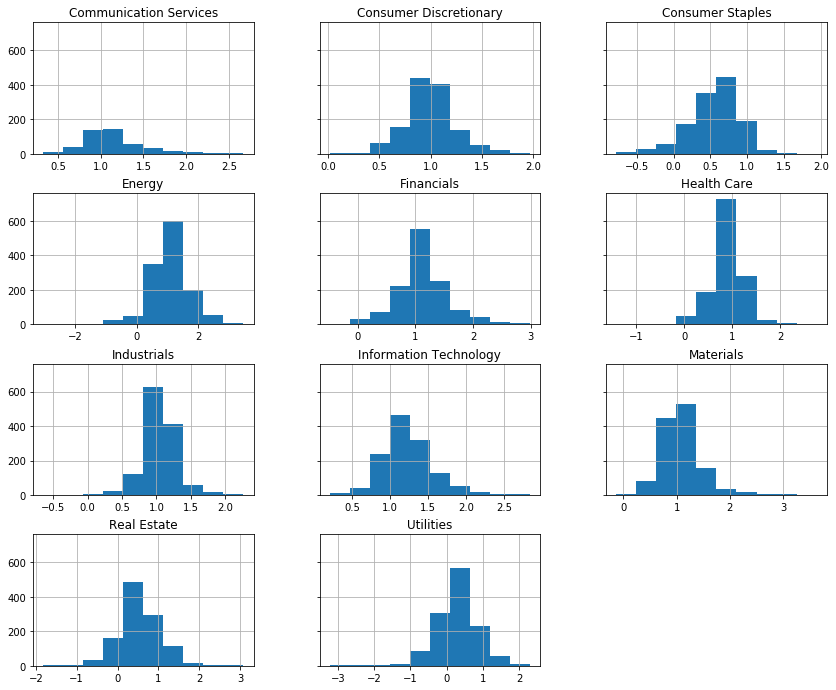

In [130]:
plot_histogram_of_betas(five_year_betas)

In [62]:
    def get_data_for_a_period(df, start_date, end_date):
      new_df = df.reset_index()
      new_df['Date'] = pd.to_datetime(new_df['Date'])
      mask = (new_df['Date'] > start_date) & (new_df['Date'] <= end_date)
      return new_df.loc[mask]

In [63]:
    def plot_sector_betas_over_time(betas_df, title):
      fig, axs = plt.subplots(6, 2, sharey=True, figsize=(15, 35))
      plt.tight_layout()
      plt.subplots_adjust(hspace=.6)
      plt.xticks(fontsize=12)
      new_df = betas_df.set_index('Date')
      for sym, ax in zip(SECTOR_ETF_SYMBOLS.keys(), axs.flatten()):
        new_df[f'{sym.lower()}_beta'].plot(
            ax=ax)
        ax.axhline(y=1, color='r')
        ax.set_ylabel('beta', fontsize=14)
        ax.set_xlabel('date', fontsize=14)
        ax.set_title(SECTOR_ETF_SYMBOLS[sym], fontsize=14)
      fig.delaxes(axs[-1, -1])
      plt.savefig(title, bbox_inches = "tight")


In [137]:
    def plot_average_betas(df, title):
      fig, ax = plt.subplots(figsize=(12, 8))
      ax.set_title(title, fontsize=18)
      ax.set_ylabel('beta', fontsize=14)
      ax.set_xlabel('sector', fontsize=14)
      new_df = df
      new_df['difference'] = df['historical_average_beta'] - df['recent_average_beta']
      new_df.sort_values(by='difference', ascending=True, inplace=True)
      new_df[['sector', 'historical_average_beta', 'recent_average_beta']].plot(kind='bar', x='sector', ax=ax)
      plt.tight_layout()
      plt.savefig(title)

In [226]:
    def t_test_for_symbol_betas(betas_df, historical_start):
      data = {'symbol': [], 'sector': [], 't_stat': [], 'p_value': [], 'significant?': [], 'recent_average_beta': [], 'historical_average_beta': [], 'difference': []}
      for sym in symbols:
        if sym == 'XLC' and historical_start < '2018-08-06':
          historical_start = '2018-08-06'
        col = f'{sym.lower()}_beta'
        historical = get_data_for_a_period(betas_df, historical_start, '2020-03-06')[col].values
        recent = get_data_for_a_period(betas_df, '2020-03-06', '2020-04-08')[col].values
        t_stat = scs.ttest_ind(recent, historical, equal_var=False)[0]
        p_value = scs.ttest_ind(recent, historical, equal_var=False)[1]
        data['symbol'].append(sym)
        data['sector'].append(SECTOR_ETF_SYMBOLS[sym])
        data['t_stat'].append(t_stat)
        data['p_value'].append(p_value)
        data['significant?'].append(p_value < .025)
        data['recent_average_beta'].append(recent.mean())
        data['historical_average_beta'].append(historical.mean())
        data['difference'].append(recent.mean() - historical.mean())
      return pd.DataFrame(data)

In [229]:
one_month = t_test_for_symbol_betas(betas, '2020-02-06')
one_month.to_csv('one_month_beta_t_test.csv')
one_month.to_clipboard()
one_month

,symbol,sector,t_stat,p_value,significant?,recent_average_beta,historical_average_beta,difference
0,XLB,Materials,-1.198600,2.435616e-01,False,1.048331,1.116781,-0.068450
1,XLC,Communication Services,1.100608,2.824849e-01,False,0.896090,0.839719,0.056371
2,XLE,Energy,1.343528,1.900695e-01,False,1.325842,1.239690,0.086152
3,XLF,Financials,8.994533,9.857384e-10,True,1.244293,0.980564,0.263729
4,XLI,Industrials,1.354104,1.870864e-01,False,1.106572,1.041571,0.065001
5,XLK,Information Technology,-5.147075,4.588191e-05,True,1.142672,1.402461,-0.259789
6,XLP,Consumer Staples,3.164770,4.427287e-03,True,0.784070,0.566587,0.217483
7,XLRE,Real Estate,6.581695,1.387834e-06,True,1.084516,0.576482,0.508034
8,XLU,Utilities,6.226841,2.050368e-06,True,1.073760,0.331524,0.742237
9,XLV,Health Care,-3.098896,5.240562e-03,True,0.882346,1.020170,-0.137824


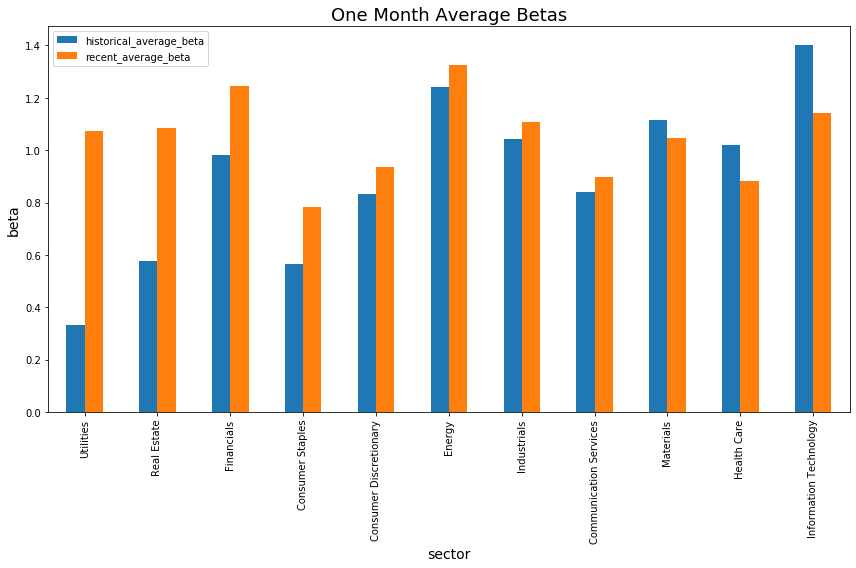

In [138]:
plot_average_betas(one_month, 'One Month Average Betas')

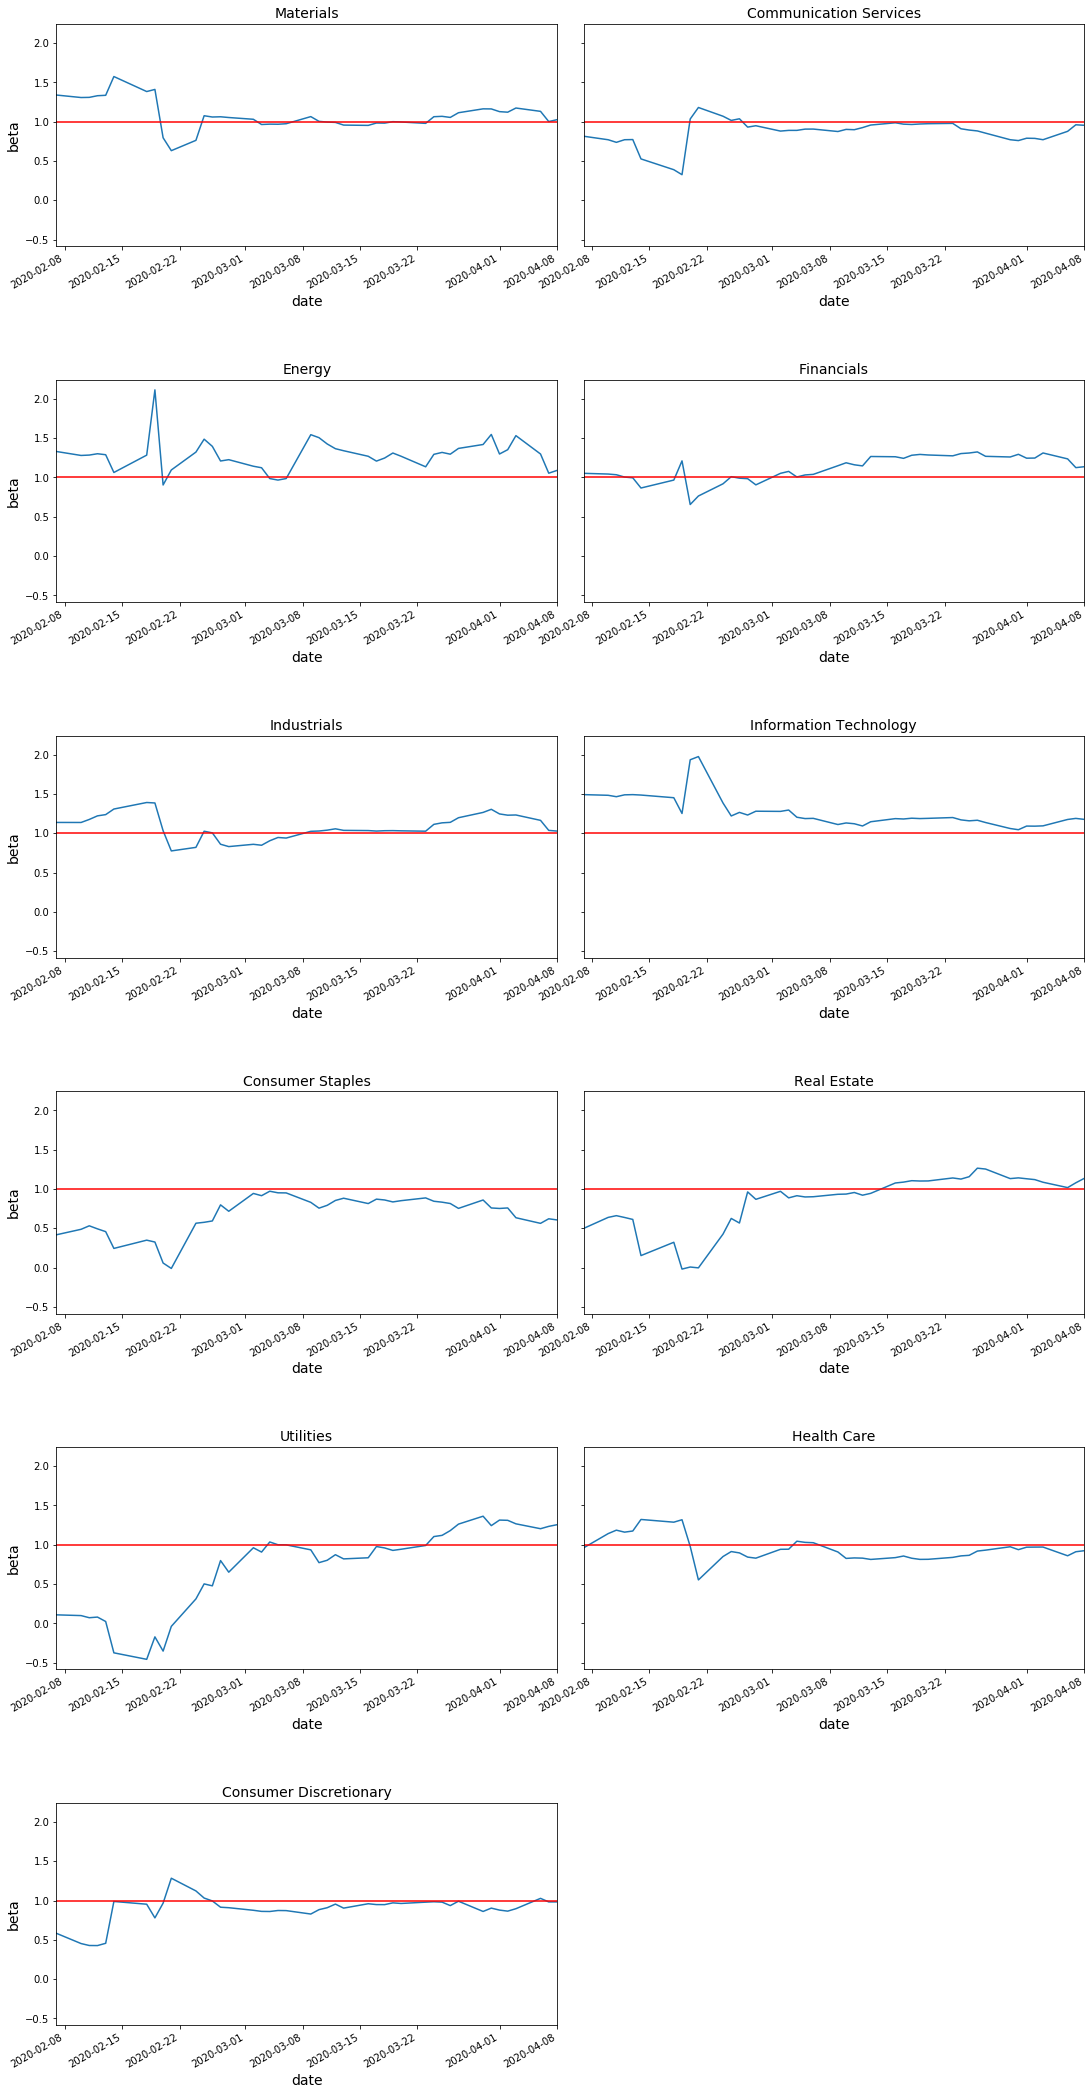

In [68]:
plot_sector_betas_over_time(get_data_for_a_period(betas, '2020-02-06', '2020-04-08'), 'one_month_betas.png')

In [233]:
three_months = t_test_for_symbol_betas(betas, '2019-12-06')
three_months.to_csv('three_month_beta_t_test.csv')
three_months.to_clipboard()
three_months

,symbol,sector,t_stat,p_value,significant?,recent_average_beta,historical_average_beta,difference
0,XLB,Materials,-0.160692,8.727849e-01,False,1.048331,1.055742,-0.007412
1,XLC,Communication Services,-1.791728,7.697743e-02,False,0.896090,0.960454,-0.064364
2,XLE,Energy,2.835502,5.791440e-03,True,1.325842,1.149153,0.176689
3,XLF,Financials,3.589798,5.810872e-04,True,1.244293,1.125255,0.119038
4,XLI,Industrials,1.556285,1.237754e-01,False,1.106572,1.057148,0.049424
5,XLK,Information Technology,-10.603117,1.043727e-16,True,1.142672,1.403319,-0.260647
6,XLP,Consumer Staples,9.385124,1.239547e-14,True,0.784070,0.434757,0.349313
7,XLRE,Real Estate,12.902066,1.728863e-20,True,1.084516,0.320393,0.764122
8,XLU,Utilities,14.247855,3.066356e-23,True,1.073760,0.160557,0.913204
9,XLV,Health Care,0.627281,5.324882e-01,False,0.882346,0.857725,0.024622


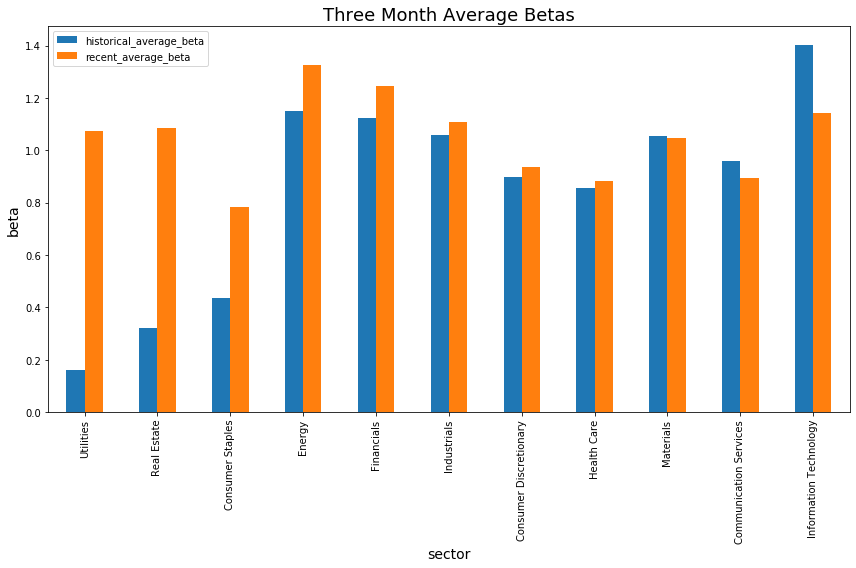

In [139]:
plot_average_betas(three_months, 'Three Month Average Betas')

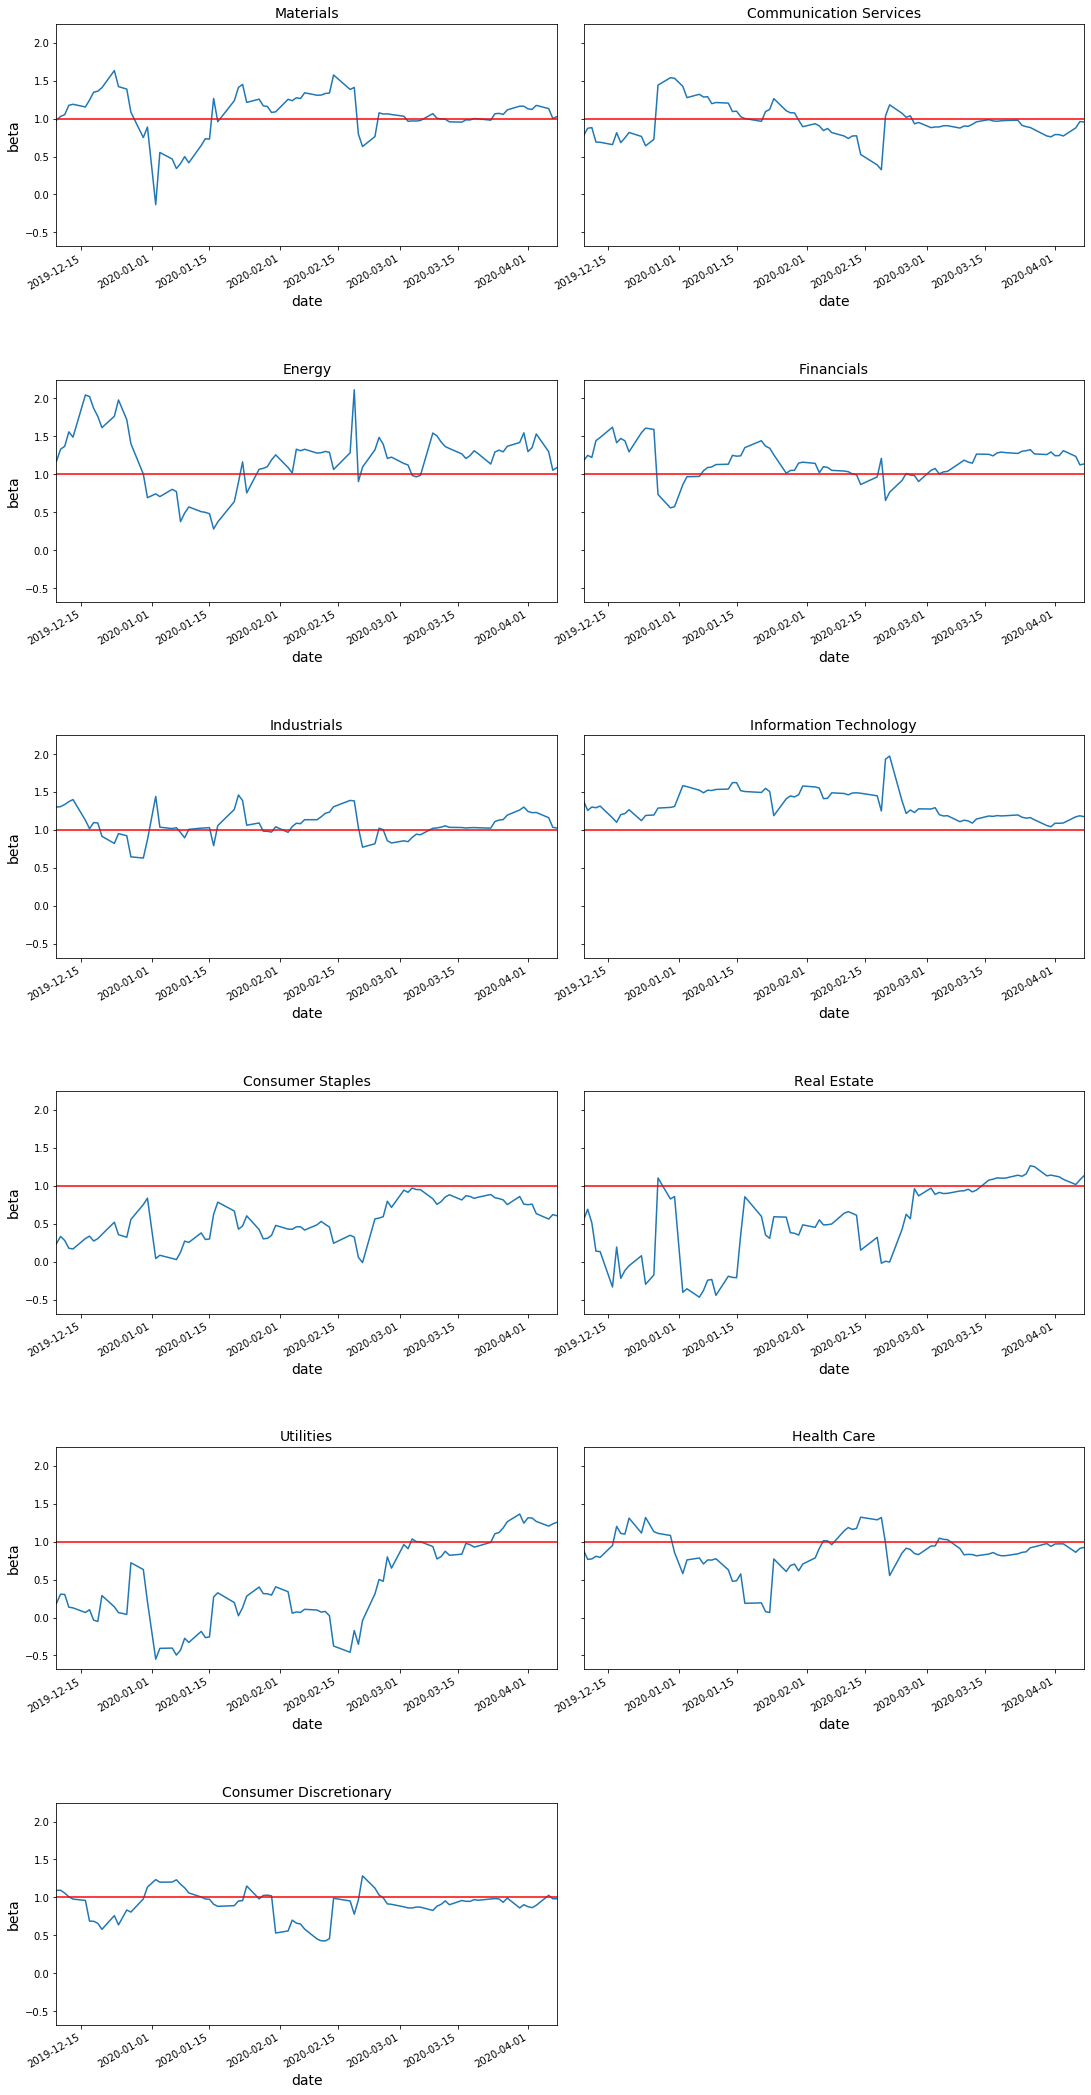

In [71]:
plot_sector_betas_over_time(get_data_for_a_period(betas, '2019-12-06', '2020-04-08'), 'three_month_betas.png')

In [232]:
one_year = t_test_for_symbol_betas(betas, '2019-03-06')
one_year.to_csv('one_year_beta_t_test.csv')
one_year.to_clipboard()
one_year

,symbol,sector,t_stat,p_value,significant?,recent_average_beta,historical_average_beta,difference
0,XLB,Materials,0.256517,7.979528e-01,False,1.048331,1.041983,0.006347
1,XLC,Communication Services,-6.699450,1.297648e-09,True,0.896090,1.054304,-0.158214
2,XLE,Energy,6.474568,1.000352e-09,True,1.325842,0.994808,0.331034
3,XLF,Financials,7.580958,2.065476e-11,True,1.244293,1.097799,0.146494
4,XLI,Industrials,-0.670128,5.048432e-01,False,1.106572,1.124898,-0.018326
5,XLK,Information Technology,-10.358425,1.129180e-20,True,1.142672,1.355792,-0.213119
6,XLP,Consumer Staples,12.389080,9.704818e-22,True,0.784070,0.419968,0.364103
7,XLRE,Real Estate,19.938651,1.062566e-43,True,1.084516,0.402853,0.681663
8,XLU,Utilities,20.507597,1.615242e-23,True,1.073760,0.110717,0.963043
9,XLV,Health Care,0.870966,3.846468e-01,False,0.882346,0.857988,0.024359


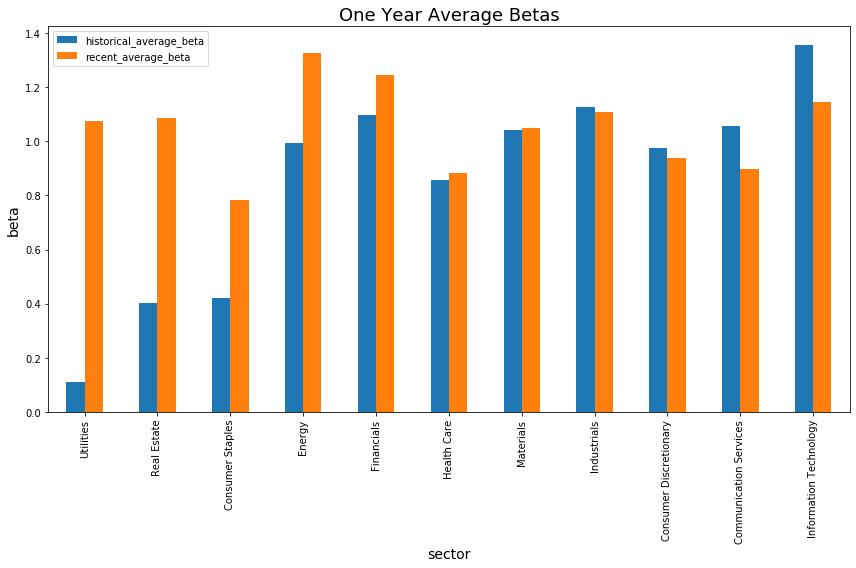

In [140]:
plot_average_betas(one_year, 'One Year Average Betas')

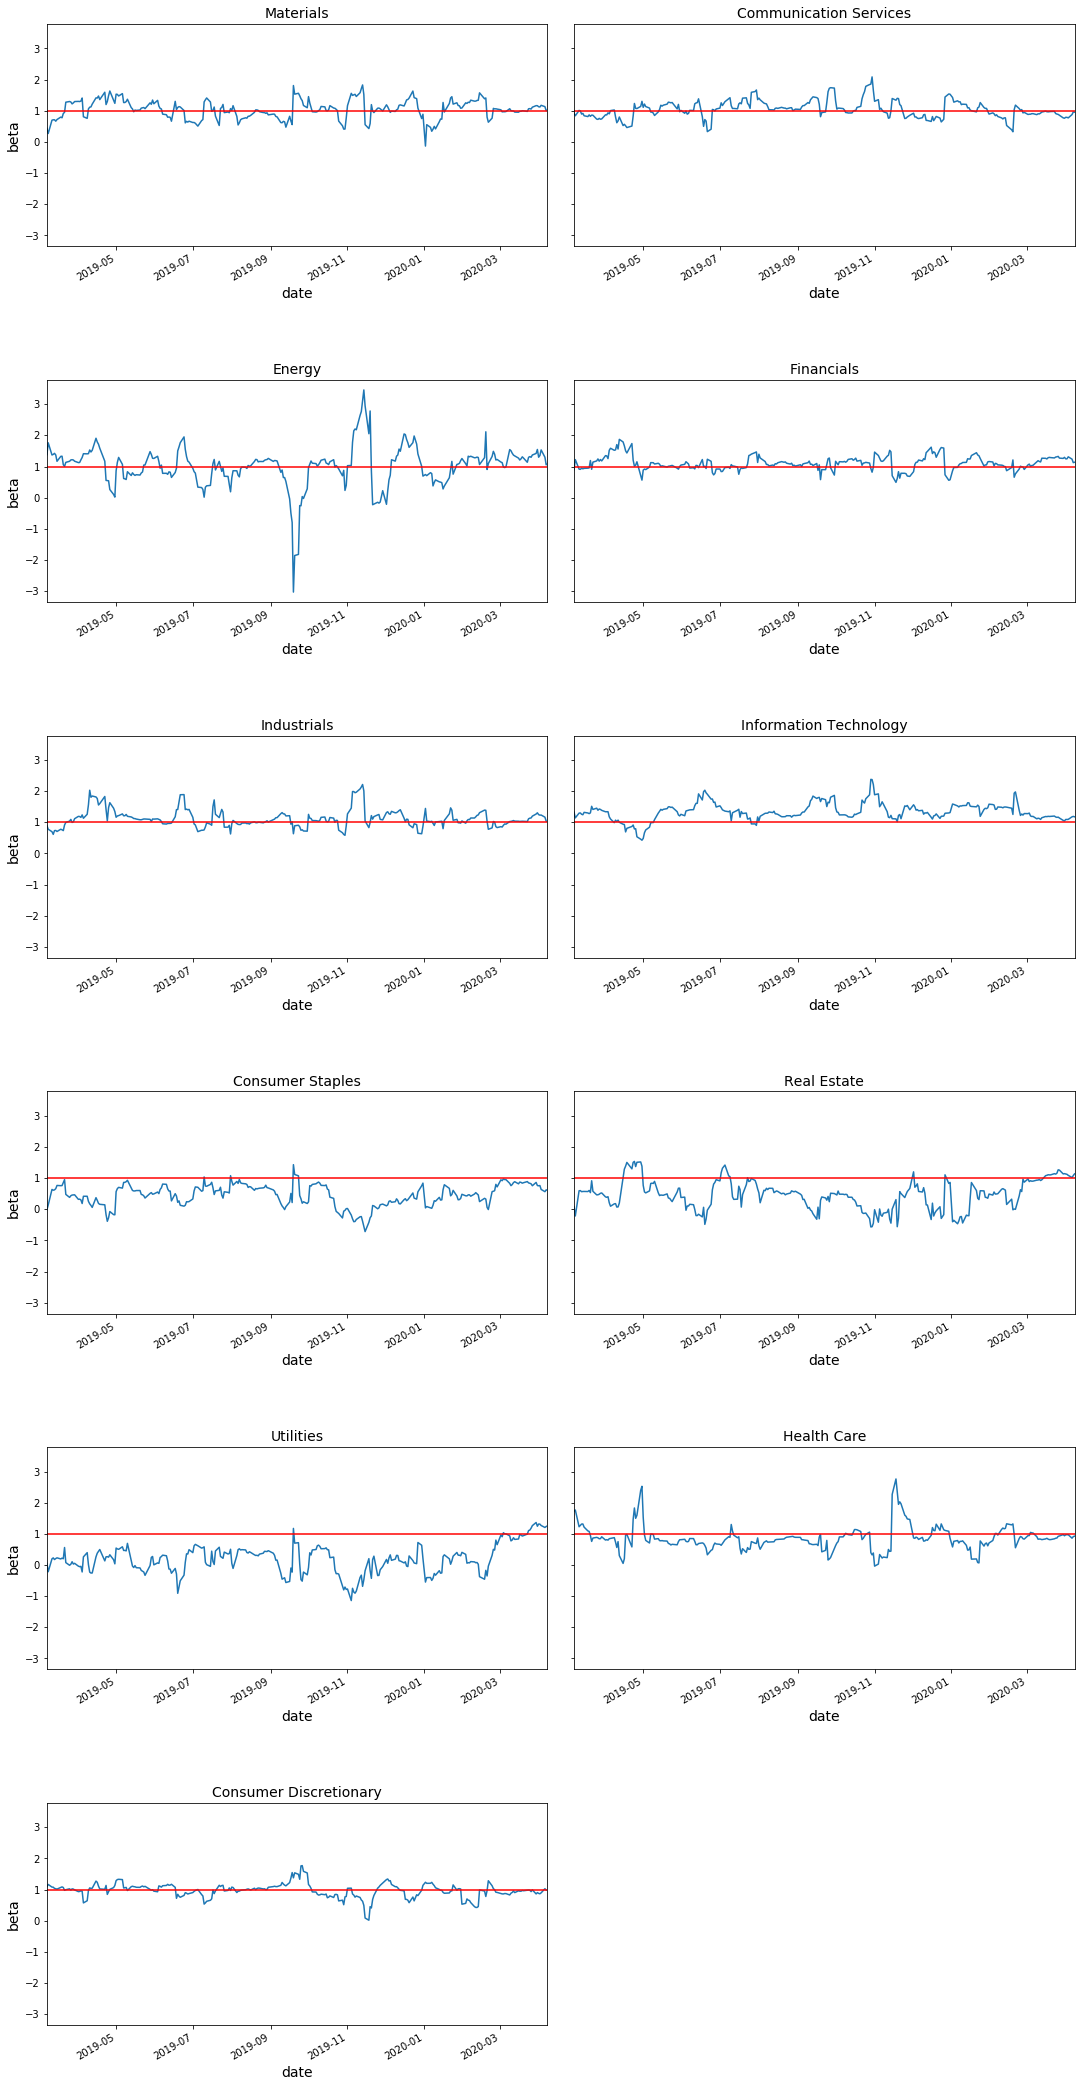

In [216]:
plot_sector_betas_over_time(get_data_for_a_period(betas, '2019-03-06', '2020-04-08'), 'one_year_betas.png')

In [159]:
    def plot_sector_betas_over_time_test(betas_df, title):
      fig, axs = plt.subplots(2, 2, sharey=True, figsize=(10, 10))
      plt.tight_layout()
      plt.subplots_adjust(hspace=.6)
      plt.xticks(fontsize=12)
      new_df = betas_df.set_index('Date')
      for sym, ax in zip(['XLC', 'XLK', 'XLRE', 'XLU'], axs.flatten()):
        new_df[f'{sym.lower()}_beta'].plot(
            ax=ax)
        ax.axhline(y=1, color='r')
        ax.set_ylabel('beta', fontsize=14)
        ax.set_xlabel('date', fontsize=14)
        ax.set_title(SECTOR_ETF_SYMBOLS[sym], fontsize=14)
      plt.savefig(title, bbox_inches = "tight")

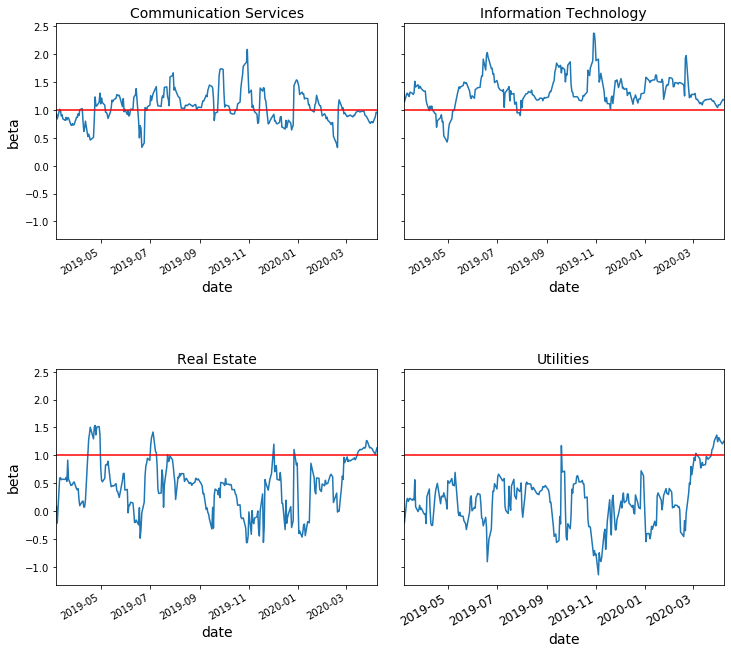

In [160]:
plot_sector_betas_over_time_test(get_data_for_a_period(betas, '2019-03-06', '2020-04-08'), 'one_year_betas.png')

In [234]:
five_year = t_test_for_symbol_betas(betas, '2015-03-06')
five_year.to_csv('five_year_beta_t_test.csv')
five_year.to_clipboard()
five_year

,symbol,sector,t_stat,p_value,significant?,recent_average_beta,historical_average_beta,difference
0,XLB,Materials,-2.643088,1.078729e-02,True,1.048331,1.097471,-0.049141
1,XLC,Communication Services,-10.123621,1.360775e-16,True,0.896090,1.126784,-0.230693
2,XLE,Energy,7.916891,2.989494e-12,True,1.325842,0.995641,0.330201
3,XLF,Financials,10.706691,3.848570e-19,True,1.244293,1.027316,0.216977
4,XLI,Industrials,1.023935,3.107873e-01,False,1.106572,1.081577,0.024995
5,XLK,Information Technology,-12.789170,8.400529e-28,True,1.142672,1.374609,-0.231937
6,XLP,Consumer Staples,13.472317,5.070694e-21,True,0.784070,0.428912,0.355158
7,XLRE,Real Estate,24.158788,2.061903e-40,True,1.084516,0.402842,0.681673
8,XLU,Utilities,21.019813,1.127037e-20,True,1.073760,0.147264,0.926497
9,XLV,Health Care,0.343239,7.318153e-01,False,0.882346,0.874909,0.007438


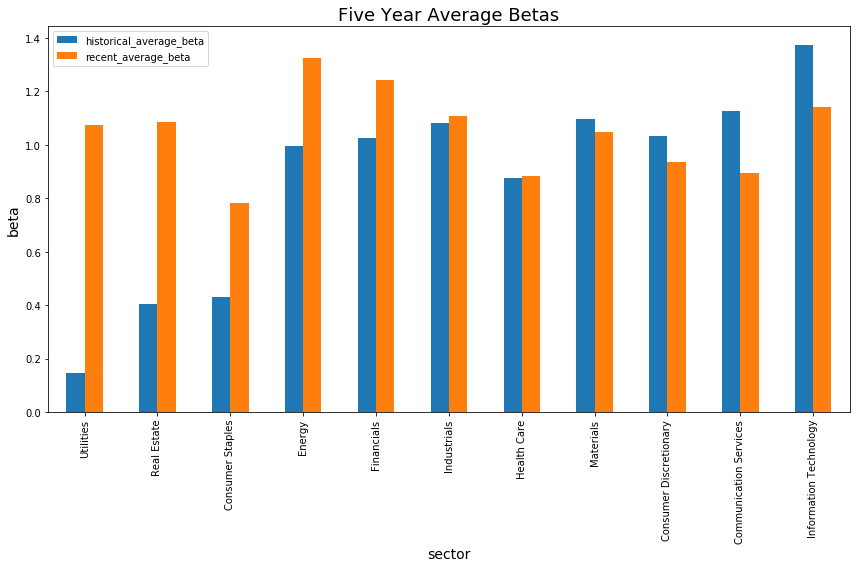

In [141]:
plot_average_betas(five_year, 'Five Year Average Betas')

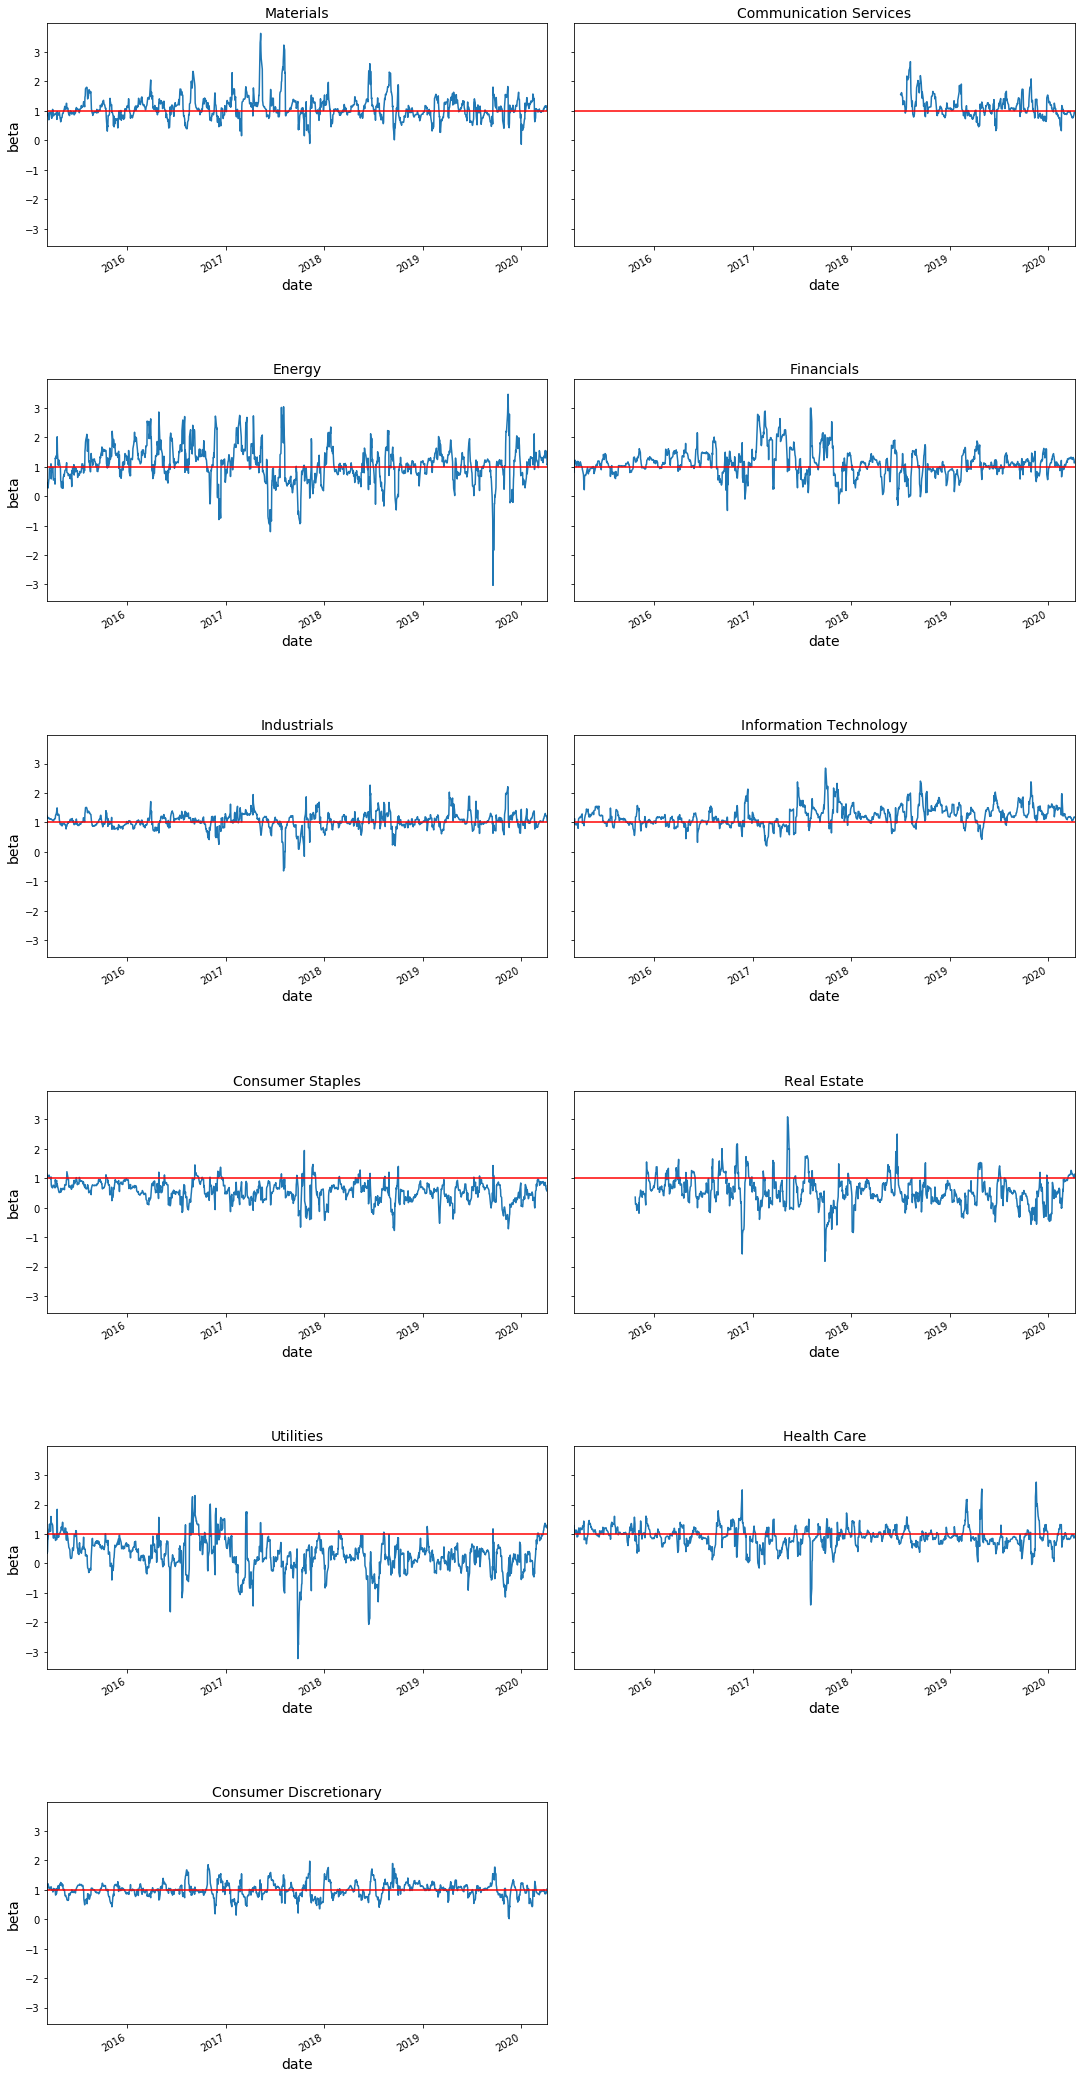

In [77]:
plot_sector_betas_over_time(get_data_for_a_period(betas, '2015-03-06', '2020-04-08'), 'five_year_betas.png')

In [78]:
    def correlation_between_stocks_and_index(df):
      data = {'symbol': [], 'sector': [], 'recent_corr': [], 'one_month_corr': [], 'three_month_corr': [], 'one_year_corr': [], 'five_year_corr': []}
      for sym in symbols:
        data['symbol'].append(sym)
        data['sector'].append(SECTOR_ETF_SYMBOLS[sym])
        col = f'{sym.lower()}_close'

        recent = get_data_for_a_period(df, '2020-02-21', '2020-04-08')
        one_month = get_data_for_a_period(df, '2020-01-21', '2020-02-21')
        three_month = get_data_for_a_period(df, '2019-10-21', '2020-01-21')
        one_year = get_data_for_a_period(df, '2019-02-21', '2020-02-21')
        five_year = get_data_for_a_period(df, '2015-02-21', '2020-02-21')

        data['recent_corr'].append(recent['spy_close'].corr(recent[col]))
        data['one_month_corr'].append(one_month['spy_close'].corr(one_month[col]))
        data['three_month_corr'].append(three_month['spy_close'].corr(three_month[col]))
        data['one_year_corr'].append(one_year['spy_close'].corr(one_year[col]))
        data['five_year_corr'].append(five_year['spy_close'].corr(five_year[col]))

      return pd.DataFrame(data)

In [79]:
corr_table = correlation_between_stocks_and_index(spy_df)
corr_table.to_clipboard()
corr_table

,symbol,sector,recent_corr,one_month_corr,three_month_corr,one_year_corr,five_year_corr
0,XLB,Materials,0.995366,0.897631,0.783390,0.902527,0.930511
1,XLC,Communication Services,0.993663,0.910120,0.985783,0.982764,0.937925
2,XLE,Energy,0.972715,0.097602,0.771859,-0.374304,0.215693
3,XLF,Financials,0.983364,0.953605,0.943732,0.970638,0.939522
4,XLI,Industrials,0.992732,0.924612,0.878791,0.962165,0.982177
5,XLK,Information Technology,0.985202,0.960493,0.994200,0.992807,0.994835
6,XLP,Consumer Staples,0.935064,0.926656,0.913278,0.912989,0.899677
7,XLRE,Real Estate,0.976049,0.810761,0.121715,0.780913,0.878332
8,XLU,Utilities,0.965579,0.568484,0.671670,0.884479,0.926799
9,XLV,Health Care,0.951312,0.855343,0.965002,0.932942,0.971502


In [211]:
    def plot_correlation(df, title):
      fig, ax = plt.subplots(figsize=(12, 8))
      ax.set_title(title, fontsize=18)
      plt.xticks(fontsize=12)
      new_corr_df['recent_cat'] = 'recent'
      sns.stripplot(ax=ax, x="category", y="correlation", data=df, jitter=0.05)
      ax.set_ylabel('correlation', fontsize=16)
      ax.set_xlabel('time period', fontsize=16)
      plt.tight_layout()
      plt.savefig(title)

In [217]:
corr_df

NameError: name 'corr_df' is not defined

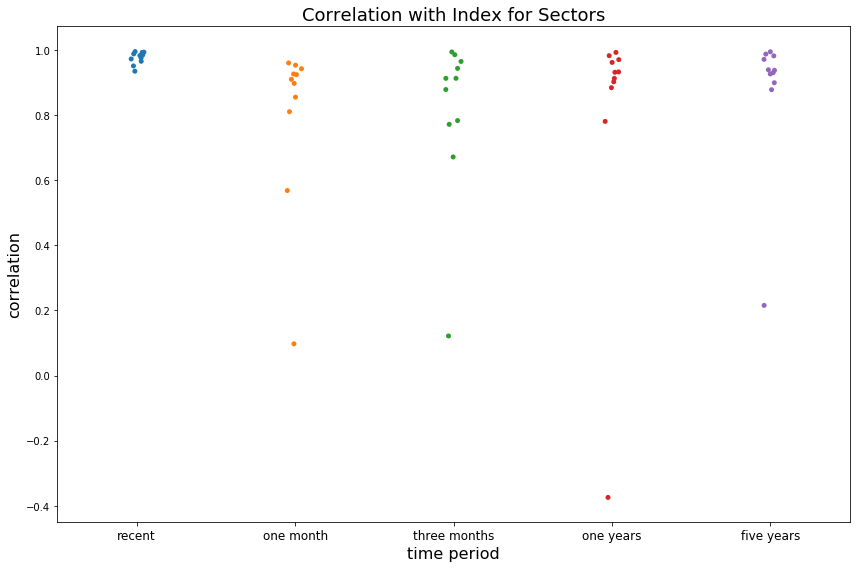

In [215]:
new_df = pd.read_csv('data/correlations_categorical.csv')
plot_correlation(new_df, 'Correlation with Index for Sectors')

In [82]:
   def plot_correlation_matrix(df, title):
      fig, ax = plt.subplots(figsize=(10, 8))
      df[IMPT_COLUMNS.keys()]
      corrMatrix = df.corr()
      sns.heatmap(corrMatrix, annot=True, ax=ax, vmin=-1, vmax=1, linewidths=1,
                       xticklabels=IMPT_COLUMNS.values(), yticklabels=IMPT_COLUMNS.values())
      b, t = plt.ylim()
      b += 0.5 
      t -= 0.5
      plt.ylim(b, t)
      ax.set_title(title, fontsize=16)
      plt.tight_layout()
      plt.savefig(title)
      plt.show()


In [83]:
        recent = get_data_for_a_period(spy_df, '2020-02-21', '2020-04-08')
        one_month = get_data_for_a_period(spy_df, '2020-01-21', '2020-02-21')
        three_month = get_data_for_a_period(spy_df, '2019-10-21', '2020-01-21')
        one_year = get_data_for_a_period(spy_df, '2019-02-21', '2020-02-21')
        five_year = get_data_for_a_period(spy_df, '2015-02-21', '2020-02-21')

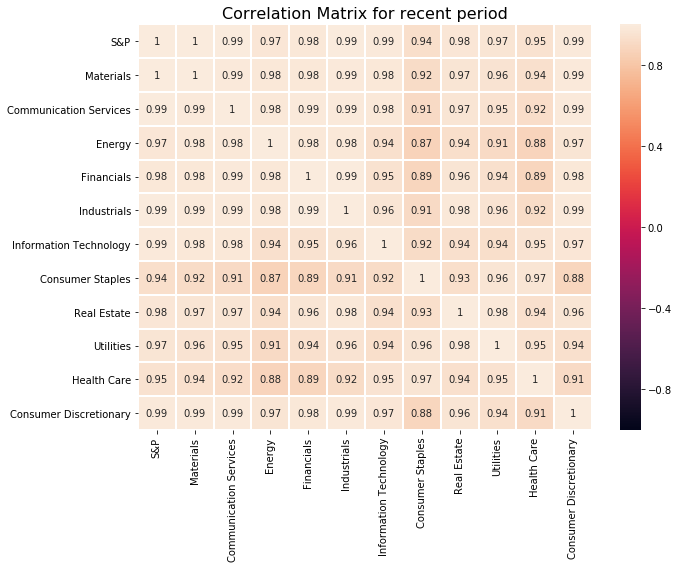

In [84]:
plot_correlation_matrix(recent, 'Correlation Matrix for recent period')

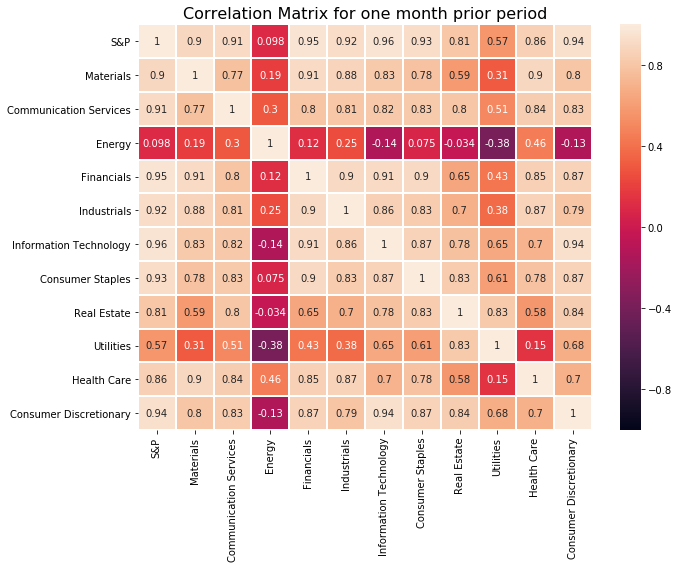

In [85]:
plot_correlation_matrix(one_month, 'Correlation Matrix for one month prior period')

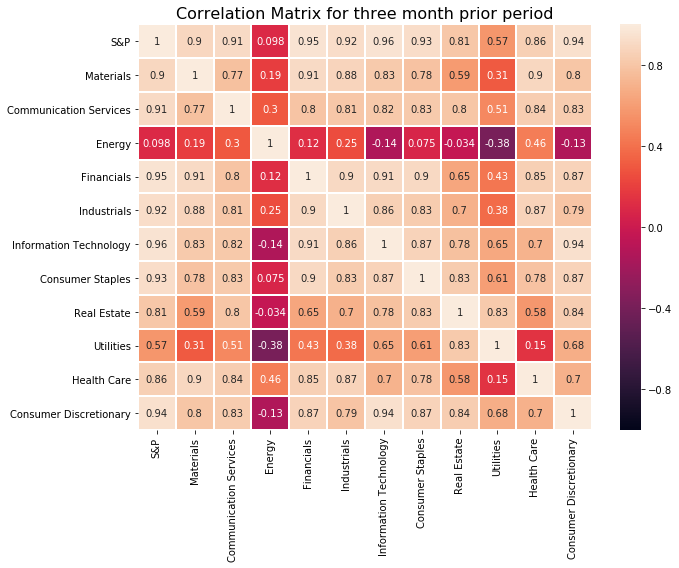

In [86]:
plot_correlation_matrix(one_month, 'Correlation Matrix for three month prior period')

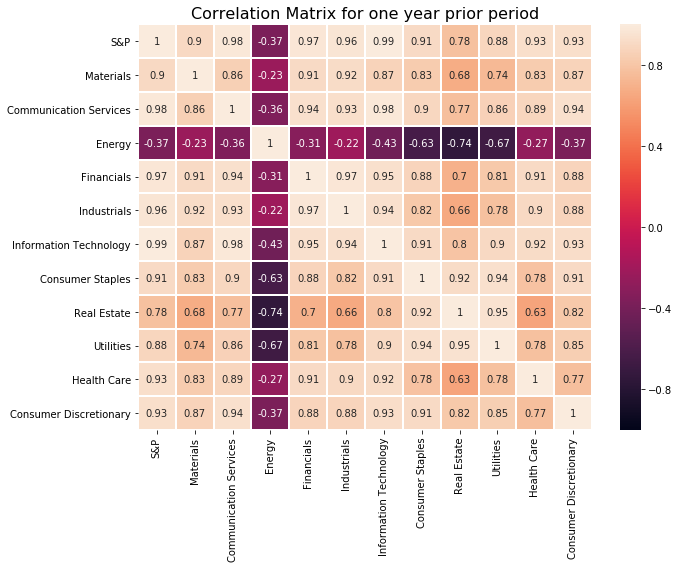

In [87]:
plot_correlation_matrix(one_year, 'Correlation Matrix for one year prior period')

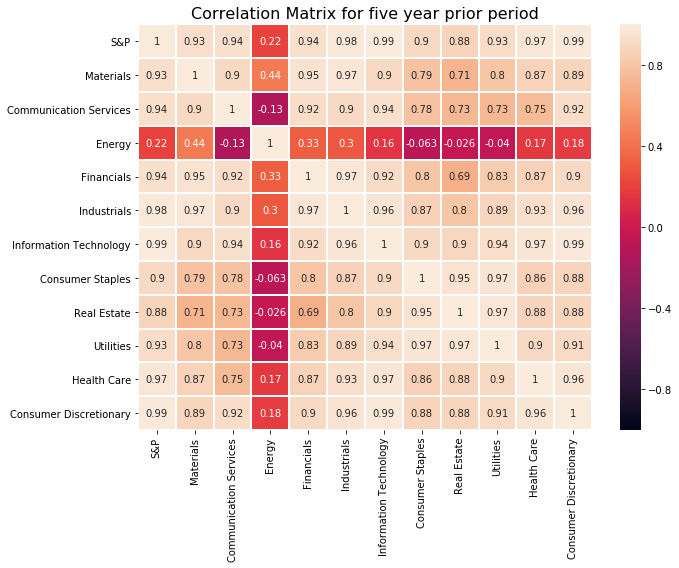

In [88]:
plot_correlation_matrix(five_year, 'Correlation Matrix for five year prior period')